In [22]:
import numpy as np
import jax.numpy as jnp
import circuitmap as cm

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

## simulated data
For each realization of a photocurrent waveform (one line in the plot above) we have many observations (corresponding to different pixels in the grid).

In [76]:
from pc_subtractr_network import Subtractr
pc_subtractr = Subtractr(args=None).load_from_checkpoint('lightning_logs/version_387505/checkpoints/epoch=55-step=56000.ckpt')

Trace generation:   0%|          | 0/537 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Trace generation:   0%|          | 0/791 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Trace generation:   0%|          | 0/891 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


Trace generation:   0%|          | 0/786 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Trace generation:   0%|          | 0/732 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Text(0.5, 1.0, 'Targets')

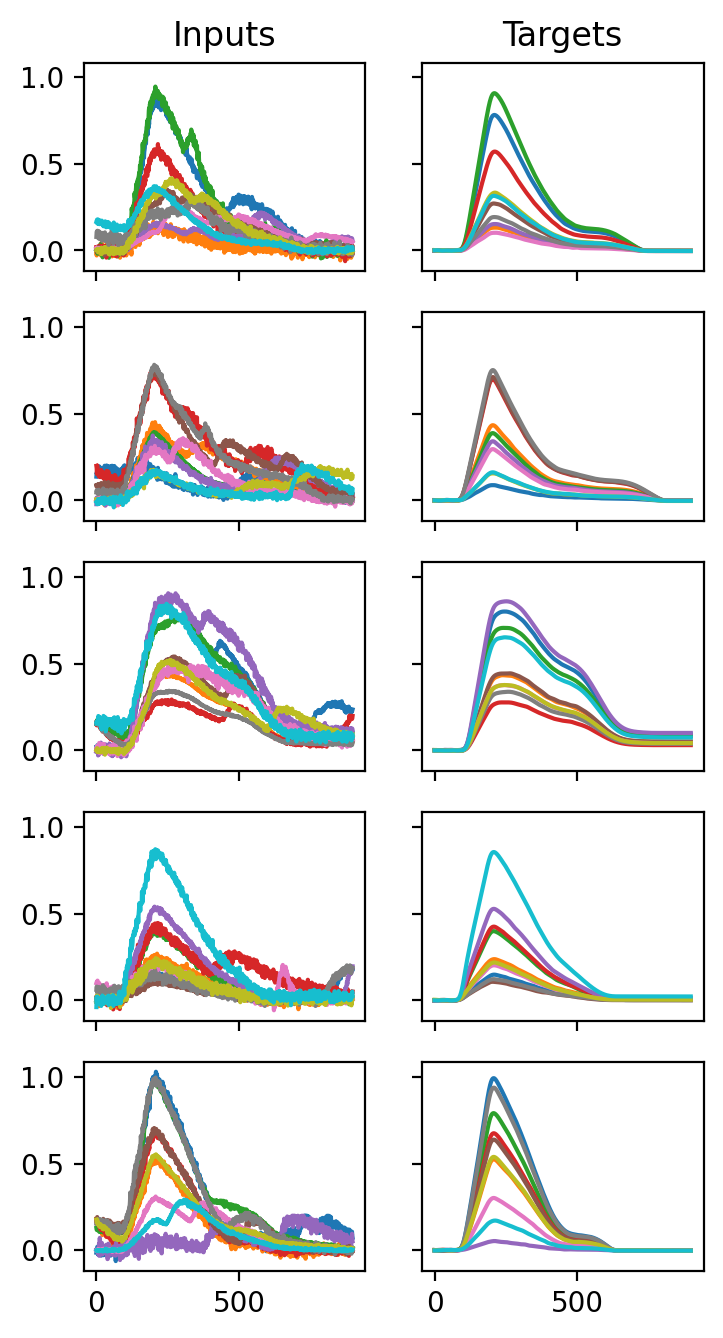

In [3]:
import pc_subtractr_network
num_expts = 5
fig, axs = plt.subplots(num_expts, 2, dpi=200, sharey=True, sharex=True, figsize=(4,8), facecolor='white')

for i in range(num_expts):
    inputs, targets = pc_subtractr_network.gen_photocurrent_data(photocurrent_fraction=1.0, num_expts=1)[0]

    axs[i, 0].plot(inputs[0:10].T)
    axs[i, 1].plot(targets[0:10].T)

axs[0, 0].set_title('Inputs')
axs[0, 1].set_title('Targets')

In [77]:
import torch
torch.set_default_dtype(torch.float64)
pc_subtractr.float()
out = pc_subtractr(torch.tensor(inputs, dtype=torch.float32))

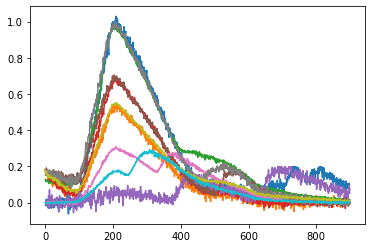

In [78]:
plt.plot(inputs[0:10].T)

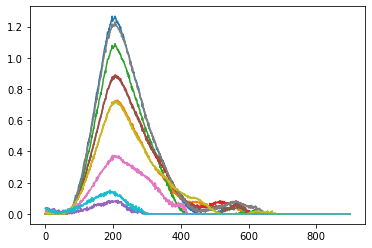

In [79]:
plt.plot(np.squeeze(out.detach().numpy())[0:10].T)

# Real data


In [80]:
import glob
data_path = 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/'
files = glob.glob(data_path + '*.npz')
print(files)

['data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_opsPositive_A_grid.npz', 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell3_opsPositive_A_planes.npz', 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell1_OpsPositive_A_planes.npz', 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_opsPositive_A_planes.npz', 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell3_opsPositive_A_grid.npz', 'data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell1_opsPositive_A_planes.npz']


In [81]:

file_idx = 0
full_path = files[file_idx]
dat = np.load(full_path, allow_pickle='True')

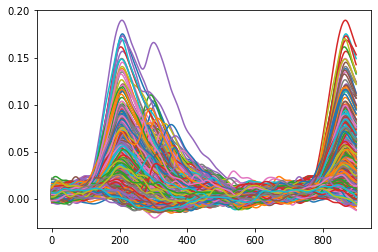

In [86]:
raw_pscs = dat['psc'][0:1000]
plt.plot(raw_pscs.T)

In [87]:
max_val = np.max(raw_pscs)
out = pc_subtractr(torch.tensor(raw_pscs / max_val, dtype=torch.float32)).detach().cpu().numpy() * max_val

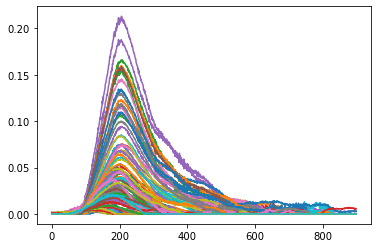

In [84]:
plt.plot(np.squeeze(out).T)

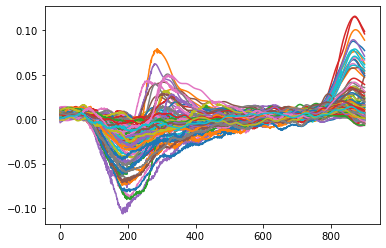

In [85]:
out = np.squeeze(out)
plt.plot((raw_pscs - out).T)